In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('data_alfa.csv', sep=',')
periods = df['VALUE_DAY'].unique()
df['DIGITAL_30_CNT'] = df['DIGITAL_30_CNT'].fillna(0)
df['TRAN_ACTIVE_30_CNT'] = df['TRAN_ACTIVE_30_CNT'].fillna(0)
df['OPER_ACTIVE_30_CNT'] = df['OPER_ACTIVE_30_CNT'].fillna(0)
df.head(10)

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,30.09.2021,18.0,8.0,9.0
1,181778433,30.09.2021,7.0,3.0,3.0
2,4271531990,30.09.2021,2.0,0.0,0.0
3,3949165697,30.09.2021,15.0,4.0,5.0
4,1926920317,30.09.2021,3.0,0.0,0.0
5,251791209,30.09.2021,0.0,0.0,0.0
6,2932045862,30.09.2021,13.0,8.0,8.0
7,1739929247,30.09.2021,25.0,10.0,14.0
8,3412845635,30.09.2021,2.0,0.0,0.0
9,3688544143,30.09.2021,0.0,0.0,0.0


In [2]:
def calculate_crr(df):
    all_clients = set()
    crr_dict = {'2021.09.30' : 1}
    for i in range(len(periods)):
        clients_current_period = set(df[df['VALUE_DAY'] == periods[i]]['CLIENT_ID'].unique())

        new_clients = clients_current_period - all_clients

        all_clients.update(clients_current_period)

        if i > 0:
            clients_previous_period = set(df[df['VALUE_DAY'] == periods[i-1]]['CLIENT_ID'].unique())
            crr = (len(clients_current_period) - len(new_clients)) / len(clients_previous_period)
            crr_dict[periods[i]] = crr
    crr_df = pd.DataFrame(list(crr_dict.items()), columns=['Period', 'CRR'])
    return crr_df

crr_df = calculate_crr(df)
crr_df

,Period,CRR
0,2021.09.30,1.000000
1,31.10.2021,0.964103
2,30.11.2021,0.966051
3,31.12.2021,0.970476
4,31.01.2022,0.897343
5,28.02.2022,0.978884


In [3]:
test = df.pivot_table(index=['VALUE_DAY'], values=['CLIENT_ID'], aggfunc='count').sort_values(by=['VALUE_DAY'],ascending=True)
test

,CLIENT_ID
VALUE_DAY,
28.02.2022,139215
30.09.2021,129232
30.11.2021,133009
31.01.2022,136771
31.10.2021,131637
31.12.2021,135957


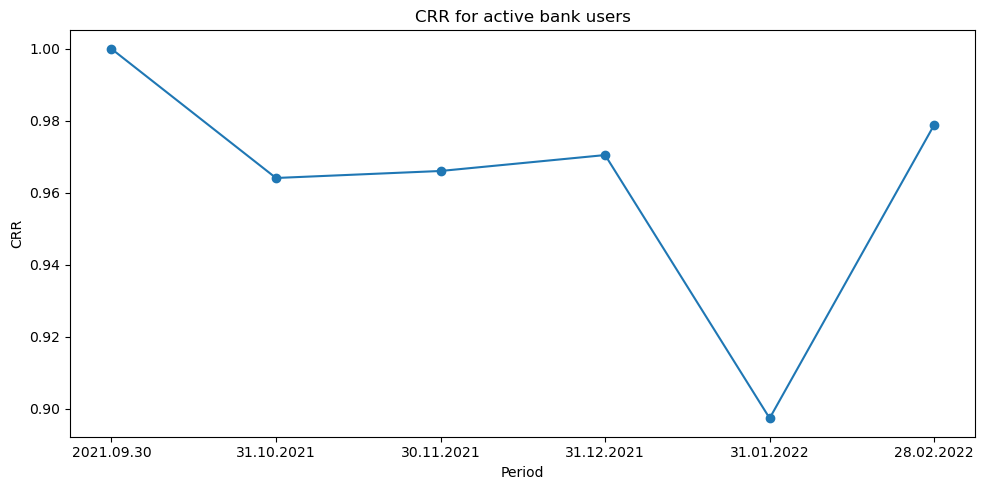

In [4]:
plt.figure(figsize=(10,5))
plt.plot(np.array(crr_df['Period']), np.array(crr_df['CRR']), marker='o')
plt.title('CRR for active bank users')
plt.xlabel('Period')
plt.ylabel('CRR')
plt.tight_layout()
plt.show()

In [5]:
def calculate_crr_d(df):
    all_clients = set()
    crr_dict = {'2021.09.30' : 1}
    for i in range(len(periods)):
        clients_current_period = set(df[(df['VALUE_DAY'] == periods[i]) & (df['DIGITAL_30_CNT'] > 0)]['CLIENT_ID'].unique())

        new_clients = clients_current_period - all_clients

        all_clients.update(clients_current_period)

        if i > 0:
            clients_previous_period = set(df[(df['VALUE_DAY'] == periods[i-1]) & (df['DIGITAL_30_CNT'] > 0)]['CLIENT_ID'].unique())
            crr = (len(clients_current_period) - len(new_clients)) / len(clients_previous_period)
            crr_dict[periods[i]] = crr
    crr_df = pd.DataFrame(list(crr_dict.items()), columns=['Period', 'CRR'])
    return crr_df

crr_df_d = calculate_crr_d(df)
crr_df_d

,Period,CRR
0,2021.09.30,1.000000
1,31.10.2021,0.935031
2,30.11.2021,0.957443
3,31.12.2021,0.962837
4,31.01.2022,0.884344
5,28.02.2022,0.979969


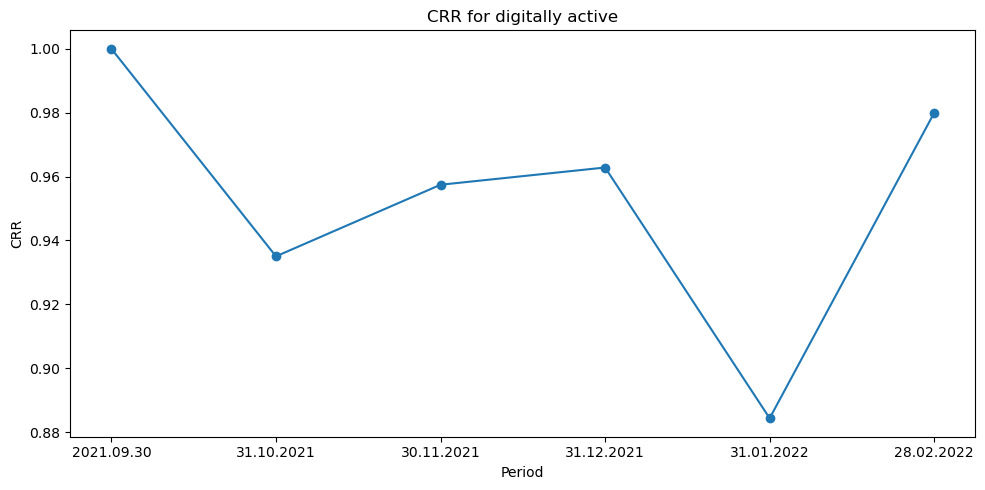

In [6]:
plt.figure(figsize=(10,5))
plt.plot(np.array(crr_df_d['Period']), np.array(crr_df_d['CRR']), marker='o')
plt.title('CRR for digitally active')
plt.xlabel('Period')
plt.ylabel('CRR')
plt.tight_layout()
plt.show()

In [7]:
def calculate_crr_o(df):
    all_clients = set()
    crr_dict = {'2021.09.30' : 1}
    for i in range(len(periods)):
        clients_current_period = set(df[(df['VALUE_DAY'] == periods[i]) & (df['OPER_ACTIVE_30_CNT'] > 0)]['CLIENT_ID'].unique())

        new_clients = clients_current_period - all_clients

        all_clients.update(clients_current_period)

        if i > 0:
            clients_previous_period = set(df[(df['VALUE_DAY'] == periods[i-1]) & (df['OPER_ACTIVE_30_CNT'] > 0)]['CLIENT_ID'].unique())
            crr = (len(clients_current_period) - len(new_clients)) / len(clients_previous_period)
            crr_dict[periods[i]] = crr
    crr_df = pd.DataFrame(list(crr_dict.items()), columns=['Period', 'CRR'])
    return crr_df

crr_df_o = calculate_crr_o(df)
crr_df_o

,Period,CRR
0,2021.09.30,1.000000
1,31.10.2021,0.846430
2,30.11.2021,0.922992
3,31.12.2021,0.954287
4,31.01.2022,0.834937
5,28.02.2022,0.972929


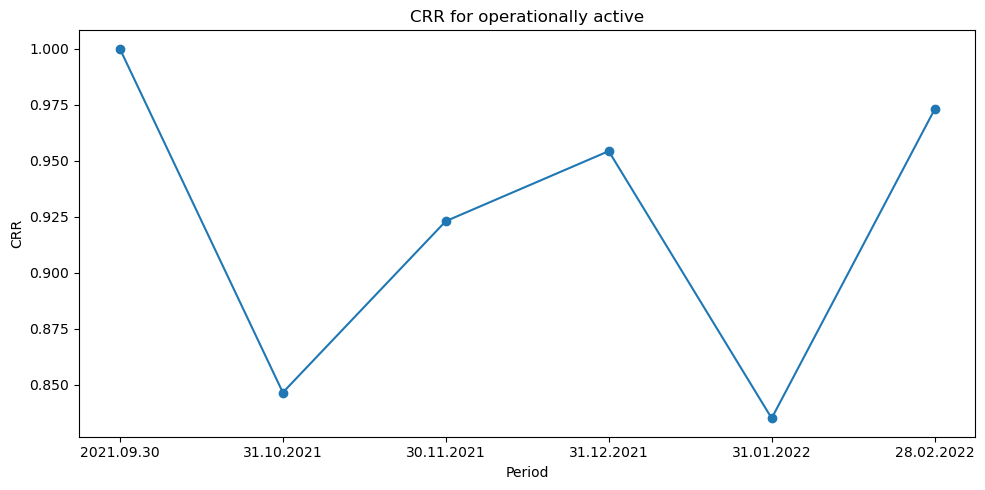

In [8]:
plt.figure(figsize=(10,5))
plt.plot(np.array(crr_df_o['Period']), np.array(crr_df_o['CRR']), marker='o')
plt.title('CRR for operationally active')
plt.xlabel('Period')
plt.ylabel('CRR')
plt.tight_layout()
plt.show()

In [9]:
def calculate_crr_t(df):
    all_clients = set()
    crr_dict = {'2021.09.30' : 1}
    for i in range(len(periods)):
        clients_current_period = set(df[(df['VALUE_DAY'] == periods[i]) & (df['TRAN_ACTIVE_30_CNT'] > 0)]['CLIENT_ID'].unique())

        new_clients = clients_current_period - all_clients

        all_clients.update(clients_current_period)

        if i > 0:
            clients_previous_period = set(df[(df['VALUE_DAY'] == periods[i-1]) & (df['TRAN_ACTIVE_30_CNT'] > 0)]['CLIENT_ID'].unique())
            crr = (len(clients_current_period) - len(new_clients)) / len(clients_previous_period)
            crr_dict[periods[i]] = crr
    crr_df = pd.DataFrame(list(crr_dict.items()), columns=['Period', 'CRR'])
    return crr_df

crr_df_t = calculate_crr_t(df)
crr_df_t

,Period,CRR
0,2021.09.30,1.000000
1,31.10.2021,0.838718
2,30.11.2021,0.910270
3,31.12.2021,0.937394
4,31.01.2022,0.842195
5,28.02.2022,0.976374


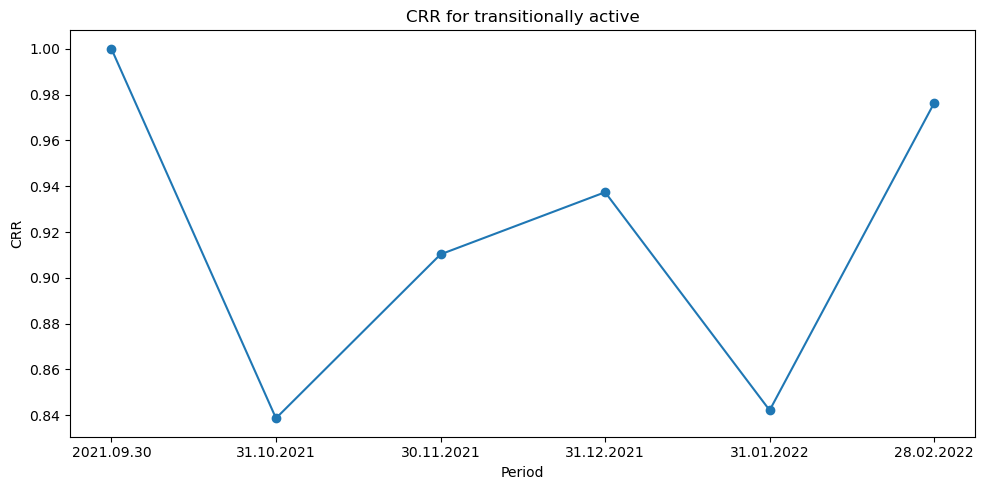

In [10]:
plt.figure(figsize=(10,5))
plt.plot(np.array(crr_df_t['Period']), np.array(crr_df_t['CRR']), marker='o')
plt.title('CRR for transitionally active')
plt.xlabel('Period')
plt.ylabel('CRR')
plt.tight_layout()
plt.show()